# Non Databowl time 

We didn't really get the databowl data/ wanted to start with something I wanted to try for some time now. <br>
I wanted to predict whether a current figurine(say American comic kind/jpop culture kind,... basically merchandise will skyrocket in price or not) <br>
I wanted to find data on different collectables instead but such a dataset does not exist/ probably have to scrape or use an outdated API(?)

## Exploring time 


Importing stuff oop

In [14]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

From fastai folder, find a file called imports.py <br>
sorry I'm not using the fastai directory 

In [15]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,forest
from IPython.display import display

from sklearn import metrics

C:\Users\tiny2\anaconda3\envs\peepee\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


###### *To note*
I made a folder in my data folder, databowl, i was lazy to change it <br>
this PATH is assuming my work directory is the ml1 folder in courses <br>
Ok wait ah its not

In [16]:
PATH = "databowl" 

In [17]:
!ls {PATH}

datasets_571_1094_anime.csv
sample_submission.csv
specs.csv
test.csv.zip
train.csv
train.csv.zip
train_labels.csv
train_labels.csv.zip


prediction variable: rating. Can drop anime ID. <br>
to determine proportion to split for  test/training 

In [19]:
df_raw = pd.read_csv(f'{PATH}/datasets_571_1094_anime.csv', low_memory=False)

### Saving for another time 
Well the file is kind of big and i want to sleep <br>
i will save my pickle format file in databowl folder so github wont read it :D 

In [1]:
import pickle

In [2]:
??open

In [20]:
import os
print(os.getcwd())

D:\New folder\OneDrive - National University of Singapore\Documents\Stat_Soc_ML\dataBowl


In [22]:
with open("databowl\\peepee", 'wb') as f:
    pickle.dump(df_raw,f)

### Note 
you can run this code instead of reading in the csv - think i included the tmp file 

In [23]:
df_raw = pickle.load(open("databowl\\peepee", 'rb'))

In [24]:
subset_df = df_raw.sample(n=5000)

In [25]:
subset_df.tail()

,anime_id,name,genre,type,episodes,rating,members
2759,11569,Precure All Stars DX the Dance Live♥: Miracle ...,"Fantasy, Magic, Music, Shoujo",OVA,1,7.17,1057
4038,6500,Seikon no Qwaser,"Action, Ecchi, Seinen, Super Power, Supernatural",TV,24,6.82,145592
8139,25063,Anime Roukyoku Kikou Shimizu no Jirochouden,"Comedy, Drama, Historical",TV,30,5.25,66
6075,5584,New Dream Hunter Rem: Setsuriku no Mudenmekyu,"Ecchi, Magic",OVA,1,6.26,502
6679,12133,Sekai Kei Sekai Ron,"Psychological, Sci-Fi",OVA,1,6.00,644


From data - genre can be splited and converted to one hot encoding(but do with piping ??) <br>
splitting into franchise name? probably I can find another dataset with the franchise and name and do a join. <br>


In [10]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [11]:
set_rf_samples(5000)

In [86]:
import dill

## Code to save session 

In [89]:
dill.dump_session('notebook_sessions.db')

NotImplementedError: Sorry, pickling not yet supported. See https://github.com/pydata/patsy/issues/26 if you want to help.

#### To load

In [ ]:
dill.load_session('notebook_session.db')

## Graph plotting time(Visualisation)

In [28]:
from ggplot import *

In [19]:
??ggplot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

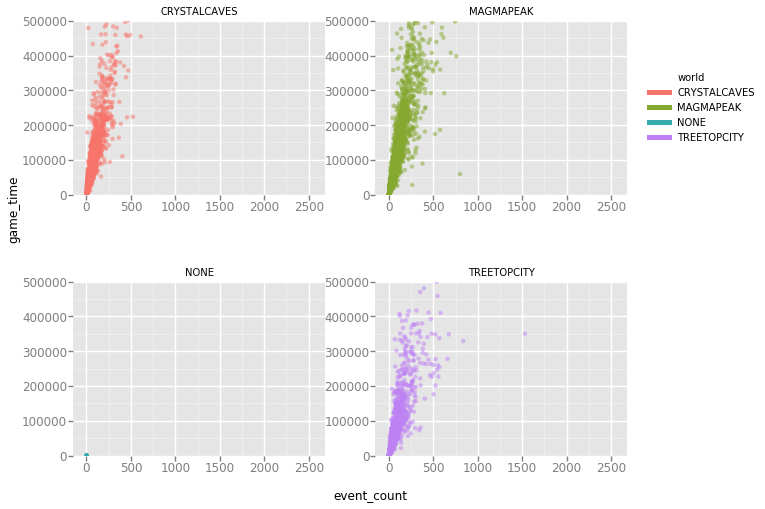

<ggplot: (154567854263)>

In [44]:
ggplot(subset_df, aes(x = 'event_count', y = 'game_time', color = 'world')) +\
geom_point(alpha = 0.5) +\
ylim(0,500000) +\
facet_wrap('world')

From the plot - 
1. None(world) has no events - maybe its like the start page or something
2. possible linear relationship between event count and game time? 
3. World seems to be independent of game_time and event_count? 

In [68]:
import json

In [84]:
subset_df.event_data.iloc[2]

'{"description":"That egg held the right amount of water to fill that hole.","identifier":"507","media_type":"animation","total_duration":3633,"round":1,"event_count":30,"game_time":46576,"event_code":3021}'

### Converting the json format of event_data into more rows:
1. media_type
2. total_duration(?)